In [1]:
import os
import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
gen = ImageDataGenerator(validation_split=0.25)
train_datagen=gen.flow_from_directory(
    directory="data",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset="training",
    seed=42
)
val_datagen=gen.flow_from_directory(
    directory="data",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset="validation",
    seed=42
)

Found 3922 images belonging to 3 classes.
Found 1306 images belonging to 3 classes.


In [3]:
model = Sequential()
model.add(Conv2D(3, (2, 2),input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(8, (2,2)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (2, 2)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(8, (2, 2)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(3, (2, 2)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(1, (2, 2)))
model.add(Activation('relu'))
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Dense(64))
model.add(Dense(16))
model.add(Dense(3, activation='softmax'))

In [4]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [5]:
batch_size=32
STEP_SIZE_TRAIN = train_datagen.n//train_datagen.batch_size
STEP_SIZE_VALID = val_datagen.n//val_datagen.batch_size

# fit model
history = model.fit(train_datagen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_datagen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=25)

Epoch 1/25


122/122 [==============================] - 63s 504ms/step - loss: 1.1537 - accuracy: 0.6147 - val_loss: 0.5661 - val_accuracy: 0.7820
Epoch 2/25
122/122 [==============================] - 10s 80ms/step - loss: 0.5579 - accuracy: 0.8000 - val_loss: 0.4449 - val_accuracy: 0.8273
Epoch 3/25
122/122 [==============================] - 9s 77ms/step - loss: 0.4675 - accuracy: 0.8303 - val_loss: 0.4404 - val_accuracy: 0.8266
Epoch 4/25
122/122 [==============================] - 10s 82ms/step - loss: 0.4472 - accuracy: 0.8278 - val_loss: 0.3181 - val_accuracy: 0.8734
Epoch 5/25
122/122 [==============================] - 10s 81ms/step - loss: 0.3654 - accuracy: 0.8632 - val_loss: 0.3100 - val_accuracy: 0.8875
Epoch 6/25
122/122 [==============================] - 10s 80ms/step - loss: 0.3511 - accuracy: 0.8758 - val_loss: 0.3221 - val_accuracy: 0.8672
Epoch 7/25
122/122 [==============================] - 10s 81ms/step - loss: 0.3199 - accuracy: 0.8789 - val_loss: 0.2857 - val_accurac

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

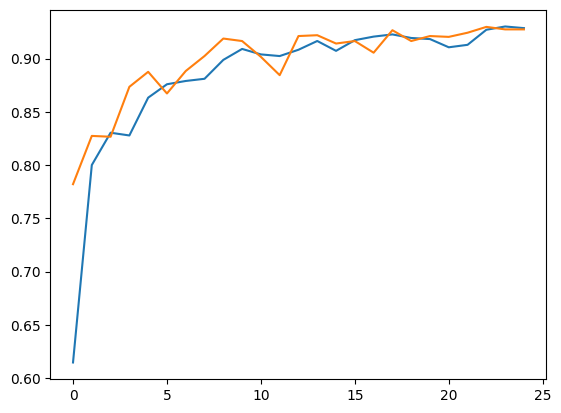

In [7]:
import matplotlib.pyplot as plt
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.show()

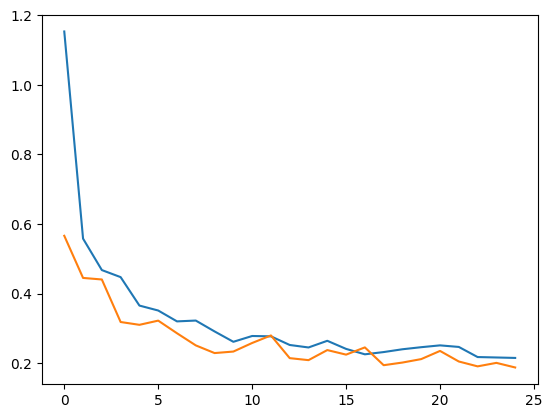

In [8]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.show()

In [9]:
accuracy_score = model.evaluate(val_datagen)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])


41/41 [==============================] - 2s 58ms/step - loss: 0.1872 - accuracy: 0.9265
[0.18724490702152252, 0.9264931082725525]
Accuracy: 92.6493%
Loss:  0.18724490702152252


In [10]:
model.save("chest_xray.h5")

c:\Users\vjana\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
preds=np.argmax(model.predict(val_datagen),axis=1)
true_labels = val_datagen.classes

41/41 [==============================] - 2s 54ms/step


In [12]:
true_labels

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
preds

array([1, 1, 0, ..., 1, 2, 1], dtype=int64)

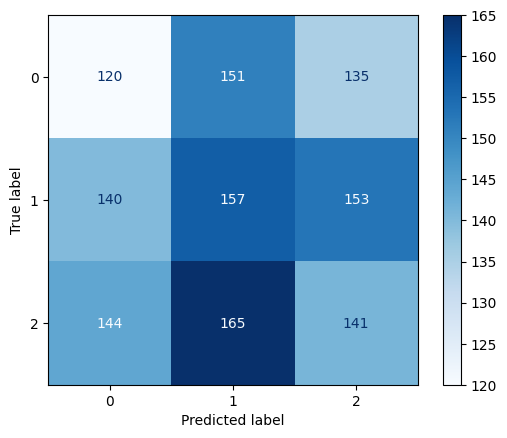

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [16]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.models import load_model
model1 = load_model('chest_xray.h5')
image = load_img('data/COVID/COVID_2.png', target_size=(256,256))
img = np.array(image)
print(img.shape)
img = img / 255.0
img = img.reshape(1,256,256,3)
pred = np.argmax(model1.predict(img)).astype('int32')
label=["COVID","NORMAL","PNEUMONIA"]
print(label[pred])

(256, 256, 3)
1/1 [==============================] - 0s 103ms/step
COVID
